In [697]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_fscore_support

In [698]:
# Load dataset
data = pd.read_csv('survey_lung_cancer.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [699]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [700]:
# Check Data Null
null_perc=data.isnull().sum()/len(data)*100
null=data.isnull().sum()
overview=pd.concat((null,null_perc,data.nunique()),axis=1, keys=['Null counts','Null %','Cardinality'])
overview

,Null counts,Null %,Cardinality
GENDER,0,0.0,2
AGE,0,0.0,39
SMOKING,0,0.0,2
YELLOW_FINGERS,0,0.0,2
ANXIETY,0,0.0,2
PEER_PRESSURE,0,0.0,2
CHRONIC DISEASE,0,0.0,2
FATIGUE,0,0.0,2
ALLERGY,0,0.0,2
WHEEZING,0,0.0,2


In [701]:
# Label Encoder
data['GENDER'].replace(['M', 'F'], [0, 1], inplace=True)
data['LUNG_CANCER'].replace(['YES', 'NO'], [0, 1], inplace=True)
data.drop_duplicates(inplace=True)
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


In [702]:
# Change value into 0,1
y = data['LUNG_CANCER']
X = data.drop('LUNG_CANCER',axis=1)

for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0


## SPLITTING DATA

In [703]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

In [704]:
from imblearn.over_sampling import RandomOverSampler
X_train,y_train=RandomOverSampler().fit_resample(X_train,y_train)

In [705]:
X.shape

(276, 15)

In [706]:
scaler = StandardScaler()
X_train['AGE'] = scaler.fit_transform(X_train[['AGE']])
X_val['AGE'] = scaler.transform(X_val[['AGE']])

X_train

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,1.177113,0,1,0,0,0,1,0,1,1,1,1,0,0
1,0,-0.491416,0,1,1,0,0,1,0,1,1,1,1,1,1
2,1,1.177113,0,1,1,1,1,1,0,0,0,0,0,0,0
3,0,0.938751,1,0,0,0,0,1,0,1,1,1,1,0,1
4,0,-0.848958,0,1,0,0,0,1,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,0.938751,1,0,0,0,0,1,0,0,0,0,1,0,0
288,0,-0.848958,1,0,0,0,0,1,1,0,0,0,1,0,1
289,0,-0.372235,0,1,1,0,0,0,0,0,0,0,0,1,1
290,0,-0.372235,0,1,1,0,0,0,0,0,0,0,0,1,1


In [707]:
# import tensorflow as tf
# model = tf.keras.models.Sequential()
# # model.add(tf.keras.layers.LSTM(64, return_sequences=True))
# # model.add(tf.keras.layers.LSTM(units=64))

# # model.add(tf.keras.layers.Conv1D(64, activation='relu',kernel_size=3, input_shape=(32,1)))
# model.add(tf.keras.layers.Dense(units=6, activation='relu', input_shape=[15]))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(units=6, activation='relu'))
# # model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(units=4, activation='relu'))
# model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# # model.add(tf.keras.layers.Dense(units=6, activation='relu'))
# # model.add(tf.keras.layers.Dense(units=1))


In [708]:
# import tensorflow as tf
# model = tf.keras.models.Sequential()
# # model.add(tf.keras.layers.LSTM(64, return_sequences=True))
# # model.add(tf.keras.layers.LSTM(units=64))

# # model.add(tf.keras.layers.Conv1D(64, activation='relu',kernel_size=3, input_shape=(32,1)))
# model.add(tf.keras.layers.Dense(units=6, activation='relu', input_shape=[15]))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(units=4, activation='relu'))
# # model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [709]:
import tensorflow as tf
model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.LSTM(64, return_sequences=True))
# model.add(tf.keras.layers.LSTM(units=64))

# model.add(tf.keras.layers.Conv1D(64, activation='relu',kernel_size=3, input_shape=[15]))
# model.add(tf.keras.layers.Embedding(10, 128, input_length=15))

model.add(tf.keras.layers.SimpleRNN(units=15, activation='tanh', input_shape=[15,1]))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
# model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [710]:
model.build()

In [711]:
model.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_17 (SimpleRNN)   (None, 15)                255       
                                                                 
 dropout_10 (Dropout)        (None, 15)                0         
                                                                 
 dense_143 (Dense)           (None, 6)                 96        
                                                                 
 flatten_41 (Flatten)        (None, 6)                 0         
                                                                 
 dense_144 (Dense)           (None, 4)                 28        
                                                                 
 dense_145 (Dense)           (None, 1)                 5         
                                                                 
Total params: 384
Trainable params: 384
Non-trainable

In [712]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0009),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, 
                        epochs=100, batch_size=16,
                        validation_data=(X_val, y_val), 
                        shuffle=True)

Epoch 1/100
19/19 [==============================] - 3s 22ms/step - loss: 0.8018 - accuracy: 0.5103 - val_loss: 0.9368 - val_accuracy: 0.1273
Epoch 2/100
19/19 [==============================] - 0s 6ms/step - loss: 0.7300 - accuracy: 0.5068 - val_loss: 0.8188 - val_accuracy: 0.1818
Epoch 3/100
19/19 [==============================] - 0s 7ms/step - loss: 0.7004 - accuracy: 0.5274 - val_loss: 0.7761 - val_accuracy: 0.2000
Epoch 4/100
19/19 [==============================] - 0s 6ms/step - loss: 0.6658 - accuracy: 0.5582 - val_loss: 0.7749 - val_accuracy: 0.2727
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 0.6588 - accuracy: 0.5548 - val_loss: 0.7465 - val_accuracy: 0.4000
Epoch 6/100
19/19 [==============================] - 0s 7ms/step - loss: 0.6381 - accuracy: 0.5822 - val_loss: 0.7367 - val_accuracy: 0.4545
Epoch 7/100
19/19 [==============================] - 0s 6ms/step - loss: 0.6048 - accuracy: 0.6199 - val_loss: 0.7127 - val_accuracy: 0.6545
Epoch 8/100


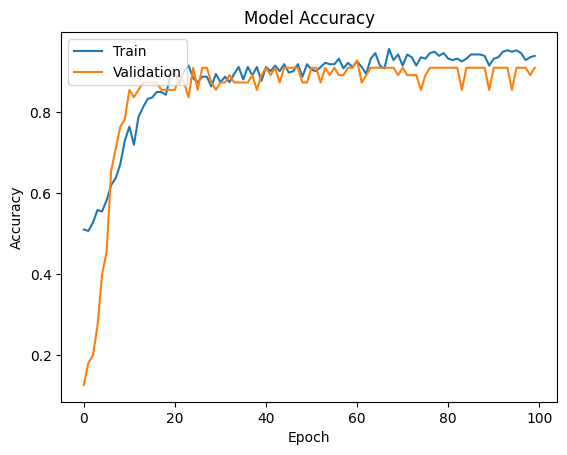

In [713]:

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')

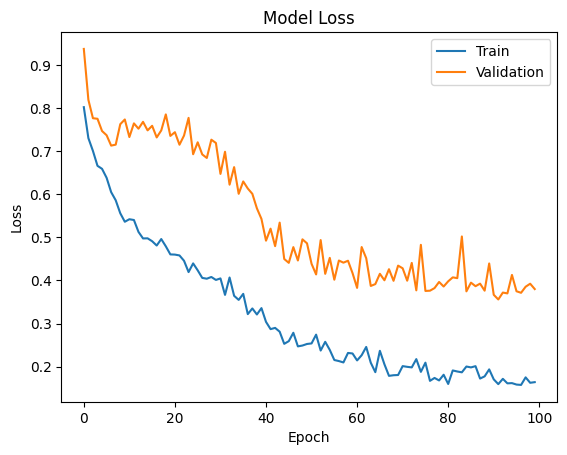

In [714]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')

In [715]:
test_loss, test_acc = model.evaluate(X_val, y_val)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

2/2 [==============================] - 0s 7ms/step - loss: 0.3801 - accuracy: 0.9091
Test loss: 0.3800613284111023
Test accuracy: 0.9090909361839294


2/2 [==============================] - 0s 6ms/step

Confusion Matrix


Text(50.722222222222214, 0.5, 'True')

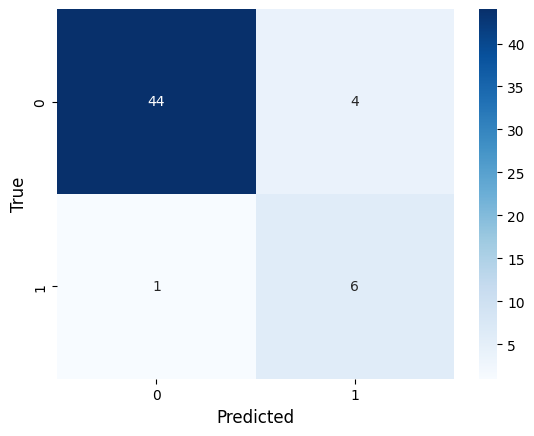

In [716]:
from sklearn.metrics import precision_recall_fscore_support
y_true = y_val
y_pred = model.predict(X_val)

# Make the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true.round(), y_pred.round())
print("\nConfusion Matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [717]:
print(classification_report(y_true.round(),y_pred.round()))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        48
           1       0.60      0.86      0.71         7

    accuracy                           0.91        55
   macro avg       0.79      0.89      0.83        55
weighted avg       0.93      0.91      0.92        55



In [ ]:
print(model.trainable_variables) 
!mkdir -p saved_model
model.save('saved_model/rnn4')

[<tf.Variable 'simple_rnn_17/simple_rnn_cell_17/kernel:0' shape=(1, 15) dtype=float32, numpy=
array([[-0.23597951,  0.56983113, -0.3404546 , -0.26966518, -0.617371  ,
         0.42864183,  0.47789526,  0.37843266,  0.3667274 , -0.00180349,
        -0.5442673 , -0.2598724 ,  0.14776127, -0.37776086,  0.3029155 ]],
      dtype=float32)>, <tf.Variable 'simple_rnn_17/simple_rnn_cell_17/recurrent_kernel:0' shape=(15, 15) dtype=float32, numpy=
array([[ 0.4955155 , -0.31073266, -0.12734419,  0.3365485 , -0.30778265,
         0.3828341 , -0.415589  , -0.04690956,  0.05658634, -0.2002628 ,
        -0.10713861,  0.20363331,  0.29403242,  0.09914237,  0.36566442],
       [ 0.17003545,  0.23728676, -0.18734586, -0.17460127,  0.05780579,
         0.4610719 ,  0.23092784, -0.22850904, -0.17336568,  0.07605466,
        -0.22800928, -0.09060424, -0.4762266 ,  0.45425823, -0.6295245 ],
       [ 0.57102317,  0.37836546,  0.09013831,  0.01729049, -0.12547375,
        -0.48074764, -0.11393147, -0.39660323

In [719]:
# =